In [3]:
# Importar las librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset__route = "data/basic4.csv"
dataset_df = pd.read_csv(dataset__route)

# 5 primeros registros
dataset_df.head(5)

,x,y,color
0,144.475109,101.450265,0
1,370.683312,298.003415,2
2,253.714046,234.079402,1
3,148.699165,78.654006,0
4,192.157973,252.837304,1


In [5]:
# Normalizo el dataset
scaler = MinMaxScaler()

dataset = scaler.fit_transform(dataset_df[["x", "y"]])
dataset

array([[0.22015942, 0.2099854 ],
       [0.79525009, 0.77576293],
       [0.49787832, 0.59175789],
       ...,
       [0.16416855, 0.18892413],
       [0.31780115, 0.24641177],
       [0.16774423, 0.18499968]])

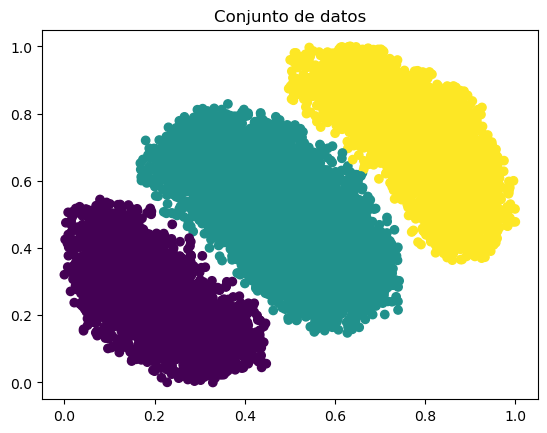

In [10]:
# Grafico el dataset en un eje 2D
plt.figure()
plt.scatter(dataset[:, 0], dataset[:, 1], c = dataset_df['color'])

plt.title("Conjunto de datos")
plt.show()

In [22]:
# Debido a la gran disposicion del grupo de puntos central, es probable que un enfoque con SpectralClustering funcione medianamente bien
from sklearn.cluster import SpectralClustering

n_clusters = 3
model = SpectralClustering(n_clusters= n_clusters, random_state = 42)

# Entreno el modelo
model.fit(dataset)

SpectralClustering(n_clusters=3, random_state=42)

In [23]:
# Obtengo las etiquetas asignados por el modelo a los diferentes puntos
labels = model.labels_
labels

array([2, 0, 0, ..., 2, 2, 2])

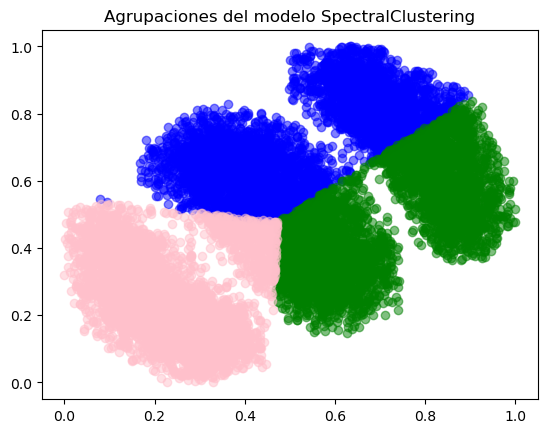

In [24]:
# Represento las agrupaciones del modelo
plt.figure()

colors = ["blue", "green", "pink"]
for _ in range(n_clusters):
    plt.scatter(dataset[labels == _][:, 0], dataset[labels == _][:, 1], c = colors[_], alpha = 0.5, label = f"Cluster_{_}")
    
plt.title("Agrupaciones del modelo SpectralClustering")
plt.show()

Podemos ver como las etiquetas de los puntos de dataset aplicadas por el modelo SpectralClustering no son las mejores, pues no se consiguen distinguir los 3 clusters de forma precisa. El modelo asume como cada uno de los tres clusteres contiene ejemplos que deberian pertenecer a un cluster especifico, aislado.

In [25]:
# Pruebo a entrenar un modelo KMeans
from sklearn.cluster import KMeans

n_clusters = 3
model = KMeans(n_clusters= n_clusters)

model.fit(dataset)

C:\Users\David\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [26]:
# Obtengo las etiquetas de los datos y los centroides de cada grupo
labels = model.labels_
centroids = model.cluster_centers_

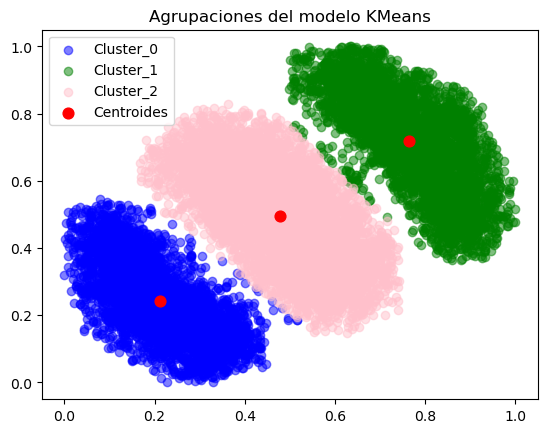

In [27]:
# Represento las agrupaciones del modelo KMeans
plt.figure()

for _ in range(n_clusters):
    plt.scatter(dataset[labels == _][:, 0], dataset[labels == _][:, 1], c = colors[_], alpha = 0.5, label = f"Cluster_{_}")
    
# Represento los centroides asociados a los clusteres
plt.scatter(centroids[:, 0], centroids[:, 1], c = "red", s = 60, label = "Centroides")
plt.title("Agrupaciones del modelo KMeans")

plt.legend()
plt.show()

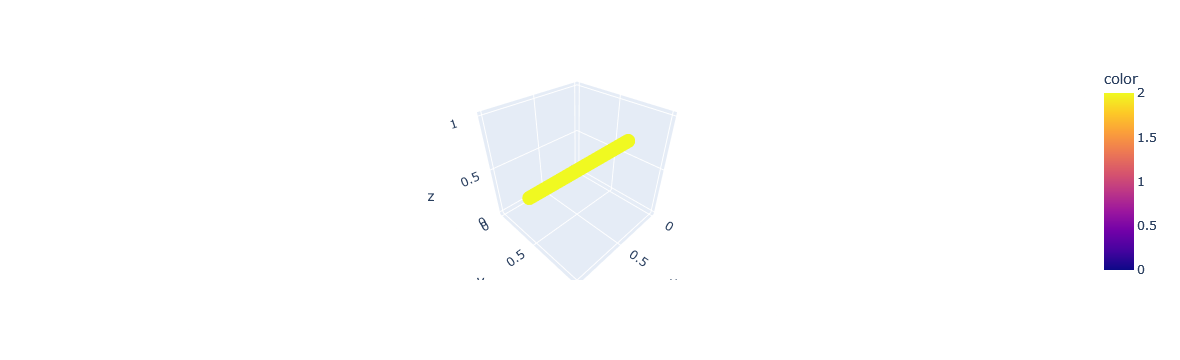

In [33]:
# Muestro las agrupaciones del modelo KMeans en un eje tridimensional
fig = px.scatter_3d(dataset, dataset[:, 0], dataset[:, 1], dataset[:, 1],color = dataset_df['color'])
fig.show()

En este caso, el modelo KMeans ha mostrado un mejor rendimiento que en los casos de ejemplos anteriores. Esto demuestra el funcionamiento iterativo de reasignacion de centroides, y por tanto, de clusters, en datasets donde los puntos representados se muestran bien separados del resto.